# Data Source
Simulacrum : Please click the link below to download Simulacrum v2.1.0: 2016-2019 data - the zipped file is 517MB .ZIP file, 5.22GB when unzipped. 

https://simulacrumii201619.s3.eu-west-2.amazonaws.com/simulacrum_v2.1.0.zip

# Dataset and Variables Used

### sim_av_patient dataset:
1. **PATIENTID**: Pseudonymized patient ID used for identification and merging with other datasets.
2. **GENDER**: Person-stated gender of the patient.
3. **ETHNICITY**: Person-stated ethnicity of the patient.
4. **VITALSTATUS**: Vital status of the patient, indicating whether they are alive or dead. (Values: D for Dead, A for Alive)
5. **VITALSTATUSDATE**: Date of vital status, specifically the date when the patient died (in cases where the patient is deceased).

### sim_av_tumour dataset:
1. **PATIENTID**: Pseudonymized patient ID used for identification and merging with other datasets.
2. **DIAGNOSISDATEBEST**: Diagnosis date of the cancer, which will be used to calculate the survival period.
3. **SITE_ICD10_O2_3CHAR**: Site of neoplasm, represented by a 3-character ICD-10/O2 code. This variable will be used to group cases based on cancer type.
4. **MORPH_ICD10_O2**: Histology of the cancer, specified in the ICD-10/O2 system.
5. **AGE**: Age of the patient at the time of cancer diagnosis, which will be used for various analyses such as calculating frailty scores.
6. **QUINTILE_2019**: Measure of deprivation, represented by the population-weighted quintile of income-level deprivation at a small area level (LSAO).
7. **PERFORMANCESTATUS**: Performance status recorded at diagnosis, which will act as the WHO performance status for calculating frailty scores.
8. **CHRL_TOT_27_03**: Total Charlson comorbidity score, which will be used for frailty score calculations.

These variables provide a comprehensive overview of patient demographics, cancer diagnoses, and factors relevant to assessing patient health and outcomes. Analyzing these datasets can offer insights into cancer epidemiology, patient demographics, survival rates, and the impact of comorbidities on cancer prognosis.

# 1) Data Merging

In [42]:
# importing libraries
import numpy as np
import pandas as pd #will be used for various task (merge, import data, change data format for date column etc)
from ydata_profiling import ProfileReport #will be used for EDA

In [43]:
# importing required datasets
patient_dataset = pd.read_csv("/Users/shrichandbhuria/Downloads/All Modules/Sem_2/ Learning Skills through Case Studies/CW4/simulacrum_v2.1.0/Data/sim_av_patient.csv")
tumour_dataset = pd.read_csv("/Users/shrichandbhuria/Downloads/All Modules/Sem_2/ Learning Skills through Case Studies/CW4/simulacrum_v2.1.0/Data/sim_av_tumour.csv", low_memory = False)

In [44]:
patient_dataset

,PATIENTID,GENDER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE,LINKNUMBER
0,10000001,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101610884
1,10000002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101343783
2,10000003,2,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101560124
3,10000004,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,101833580
4,10000005,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100957799
...,...,...,...,...,...,...,...,...,...,...,...,...
1871600,250002539,2,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2022-07-05,100642102
1871601,250002540,2,L,NaN,NaN,NaN,NaN,NaN,NaN,D,2021-06-10,101223249
1871602,250002541,2,A,C439,NaN,NaN,NaN,I259,4,D,2022-06-10,100870402
1871603,250002542,1,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,2019-09-25,100803641


In [45]:
patient_dataset.columns

Index(['PATIENTID', 'GENDER', 'ETHNICITY', 'DEATHCAUSECODE_1A',
       'DEATHCAUSECODE_1B', 'DEATHCAUSECODE_1C', 'DEATHCAUSECODE_2',
       'DEATHCAUSECODE_UNDERLYING', 'DEATHLOCATIONCODE', 'VITALSTATUS',
       'VITALSTATUSDATE', 'LINKNUMBER'],
      dtype='object')

In [46]:
tumour_dataset

,TUMOURID,GENDER,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,SITE_ICD10_O2,SITE_ICD10R4_O2_3CHAR_FROM2013,SITE_ICD10R4_O2_FROM2013,SITE_ICDO3REV2011,SITE_ICDO3REV2011_3CHAR,...,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED
0,10399610,1,10000001,2017-03-31,C44,C444,C44,C444,C444,C44,...,4,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN
1,10694862,1,10000002,2016-01-14,C44,C449,C44,C449,C449,C44,...,5 - least deprived,2016-01-14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,11938715,2,10000003,2018-12-10,C44,C442,C44,C442,C442,C44,...,3,2018-12-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,11869010,1,10000004,2018-04-05,C44,C449,C44,C449,C449,C44,...,4,NaN,C,0.0,1.0,06,NaN,NaN,NaN,NaN
4,11037077,1,10000005,2018-04-23,C44,C446,C44,C446,C446,C44,...,3,2018-04-23,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,11848292,1,250002429,2018-01-23,C64,C64,C64,C64,C669,C66,...,2,NaN,C,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1995566,11802787,1,250002512,2019-02-05,C61,C61,C61,C61,C619,C61,...,1 - most deprived,2019-02-05,NaN,NaN,3.0,"04,13",3.0,4.0,NaN,7.0
1995567,11070198,1,250000217,2018-11-30,C73,C73,C73,C73,C659,C65,...,1 - most deprived,2018-11-30,NaN,NaN,2.0,13,NaN,NaN,NaN,NaN
1995568,10795064,1,250001761,2018-03-19,C66,C66,C66,C66,C341,C34,...,5 - least deprived,2018-03-19,9,NaN,2.0,"01,09",NaN,NaN,NaN,NaN


In [47]:
tumour_dataset.columns

Index(['TUMOURID', 'GENDER', 'PATIENTID', 'DIAGNOSISDATEBEST',
       'SITE_ICD10_O2_3CHAR', 'SITE_ICD10_O2',
       'SITE_ICD10R4_O2_3CHAR_FROM2013', 'SITE_ICD10R4_O2_FROM2013',
       'SITE_ICDO3REV2011', 'SITE_ICDO3REV2011_3CHAR', 'MORPH_ICD10_O2',
       'MORPH_ICDO3REV2011', 'BEHAVIOUR_ICD10_O2', 'BEHAVIOUR_ICDO3REV2011',
       'T_BEST', 'N_BEST', 'M_BEST', 'STAGE_BEST', 'GRADE', 'AGE', 'CREG_CODE',
       'STAGE_BEST_SYSTEM', 'LATERALITY', 'SCREENINGSTATUSFULL_CODE',
       'ER_STATUS', 'PR_STATUS', 'HER2_STATUS', 'QUINTILE_2019',
       'DATE_FIRST_SURGERY', 'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS',
       'CHRL_TOT_27_03', 'COMORBIDITIES_27_03', 'GLEASON_PRIMARY',
       'GLEASON_SECONDARY', 'GLEASON_TERTIARY', 'GLEASON_COMBINED'],
      dtype='object')

In [48]:
# merging patient dataset with tumour dataset
merged_dataset = pd.merge(patient_dataset, tumour_dataset, on="PATIENTID")

In [49]:
# to take in only rows with VITALSTATUS = D (dead) or A (alive)
set2 = merged_dataset[merged_dataset['VITALSTATUS'].isin(['D', 'A'])]
set2

,PATIENTID,GENDER_x,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,VITALSTATUS,...,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED
0,10000001,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,...,4,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN
1,10000002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,...,5 - least deprived,2016-01-14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,10000003,2,A,NaN,NaN,NaN,NaN,NaN,NaN,A,...,3,2018-12-10,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,10000004,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,...,4,NaN,C,0.0,1.0,06,NaN,NaN,NaN,NaN
4,10000005,1,A,NaN,NaN,NaN,NaN,NaN,NaN,A,...,3,2018-04-23,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,250002540,2,L,NaN,NaN,NaN,NaN,NaN,NaN,D,...,1 - most deprived,2016-06-09,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1995566,250002541,2,A,C439,NaN,NaN,NaN,I259,4,D,...,3,2018-01-25,C,NaN,1.0,07,NaN,NaN,NaN,NaN
1995567,250002542,1,A,C66,NaN,NaN,"I259,J449,I10",C66,2,D,...,4,2019-07-18,NaN,NaN,3.0,"01,02,06",NaN,NaN,NaN,NaN
1995568,250002543,2,A,C809,NaN,NaN,I259,K559,2,D,...,5 - least deprived,2016-11-27,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


# 2) Data Preparation

# 2.1) Selecting relevant variables and value for analysis

In [50]:
# to select relevant variables for analysis which contains all types of cancer
set3 = set2[["PATIENTID", "GENDER_x", "ETHNICITY", "VITALSTATUS", "VITALSTATUSDATE", "DIAGNOSISDATEBEST", "SITE_ICD10_O2_3CHAR", "MORPH_ICD10_O2", "BEHAVIOUR_ICD10_O2", "AGE", "QUINTILE_2019", "PERFORMANCESTATUS", "CHRL_TOT_27_03"]]
set3

,PATIENTID,GENDER_x,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,AGE,QUINTILE_2019,PERFORMANCESTATUS,CHRL_TOT_27_03
0,10000001,1,A,A,2022-07-05,2017-03-31,C44,8070,3,84,4,3.0,0.0
1,10000002,1,NaN,A,2022-07-05,2016-01-14,C44,8090,3,67,5 - least deprived,NaN,0.0
2,10000003,2,A,A,2022-07-05,2018-12-10,C44,8070,3,79,3,NaN,0.0
3,10000004,1,A,A,2022-07-05,2018-04-05,C44,8090,3,76,4,0.0,1.0
4,10000005,1,A,A,2022-07-05,2018-04-23,C44,8070,3,49,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995565,250002540,2,L,D,2021-06-10,2016-06-09,D01,9440,2,63,1 - most deprived,NaN,0.0
1995566,250002541,2,A,D,2022-06-10,2018-01-25,C67,8120,3,64,3,NaN,1.0
1995567,250002542,1,A,D,2019-09-25,2019-07-18,C45,8810,3,46,4,NaN,3.0
1995568,250002543,2,A,D,2020-05-24,2016-10-18,C49,8851,3,75,5 - least deprived,NaN,0.0


In [51]:
patient_counts = set3['SITE_ICD10_O2_3CHAR'].value_counts()
patient_counts.head(50)


SITE_ICD10_O2_3CHAR
C44    513647
C50    186896
C61    179127
C34    156632
C18     96059
D06     83475
C43     57733
C20     38881
C64     38711
C25     35430
C67     34334
C54     31520
C15     30278
D05     28628
D03     26441
C83     24818
C56     23234
C22     21341
C16     21078
C90     20650
C71     18257
C91     18184
D01     16112
C92     15197
C73     13269
D47     12172
C53     11359
D32     11134
C85     10857
D46     10436
D07      9844
C45      9151
C82      9086
C62      8059
C19      7847
C81      7272
C32      6830
C09      6742
C49      6685
D37      6059
C17      6024
D48      5349
C78      5156
C21      5055
C01      4759
C02      4731
C24      4473
C51      4449
D09      4167
D41      4141
Name: count, dtype: int64

In [52]:
# if the value in the 'SITE_ICD10_O2_3CHAR' column is equal to "C61", which represents prostate cancer or metastatic prostate cancer 
# according to the ICD-10/O2 coding system
set4 = set3[set3['SITE_ICD10_O2_3CHAR'].isin(["C61"])]
set4

,PATIENTID,GENDER_x,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,AGE,QUINTILE_2019,PERFORMANCESTATUS,CHRL_TOT_27_03
143755,10133422,1,X,A,2022-07-05,2019-03-11,C61,8140,3,44,3,0.0,1.0
143761,10133426,1,A,A,2022-07-05,2018-12-05,C61,8140,3,79,5 - least deprived,1.0,1.0
144097,10133733,1,A,A,2022-07-05,2019-03-19,C61,8140,3,81,4,9.0,0.0
144145,10133777,1,A,A,2022-07-05,2018-04-13,C61,8140,3,70,1 - most deprived,0.0,3.0
144194,10133821,1,A,A,2022-07-05,2017-07-14,C61,8500,3,72,1 - most deprived,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995483,250002467,1,A,D,2019-12-26,2017-10-26,C61,8140,2,44,1 - most deprived,1.0,0.0
1995486,250002469,1,A,A,2022-07-05,2019-10-26,C61,8000,3,73,1 - most deprived,0.0,0.0
1995534,250002512,1,A,D,2021-06-23,2019-02-05,C61,8140,3,59,1 - most deprived,NaN,3.0
1995551,250002527,1,A,D,2020-01-22,2017-01-17,C61,8070,3,70,5 - least deprived,NaN,2.0


In [53]:
# to rename variable GENDER_x to GENDER
set4.rename(columns = {'GENDER_x' : 'GENDER'}, inplace = True)
set4.columns

/var/folders/5b/rt6j1f1d5lj4wyfy5sdjhyyr0000gn/T/ipykernel_6604/425181281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set4.rename(columns = {'GENDER_x' : 'GENDER'}, inplace = True)


Index(['PATIENTID', 'GENDER', 'ETHNICITY', 'VITALSTATUS', 'VITALSTATUSDATE',
       'DIAGNOSISDATEBEST', 'SITE_ICD10_O2_3CHAR', 'MORPH_ICD10_O2',
       'BEHAVIOUR_ICD10_O2', 'AGE', 'QUINTILE_2019', 'PERFORMANCESTATUS',
       'CHRL_TOT_27_03'],
      dtype='object')

In [54]:
set5 = set4.copy()

In [55]:
# to replace value in QUINTILE_2019 columns (5 - least deprived : 5 | 1 - most deprived : 1)
set5["QUINTILE_2019"].replace({"5 - least deprived" : "5", "1 - most deprived" : "1"}, inplace = True)

In [56]:
set5

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,AGE,QUINTILE_2019,PERFORMANCESTATUS,CHRL_TOT_27_03
143755,10133422,1,X,A,2022-07-05,2019-03-11,C61,8140,3,44,3,0.0,1.0
143761,10133426,1,A,A,2022-07-05,2018-12-05,C61,8140,3,79,5,1.0,1.0
144097,10133733,1,A,A,2022-07-05,2019-03-19,C61,8140,3,81,4,9.0,0.0
144145,10133777,1,A,A,2022-07-05,2018-04-13,C61,8140,3,70,1,0.0,3.0
144194,10133821,1,A,A,2022-07-05,2017-07-14,C61,8500,3,72,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995483,250002467,1,A,D,2019-12-26,2017-10-26,C61,8140,2,44,1,1.0,0.0
1995486,250002469,1,A,A,2022-07-05,2019-10-26,C61,8000,3,73,1,0.0,0.0
1995534,250002512,1,A,D,2021-06-23,2019-02-05,C61,8140,3,59,1,NaN,3.0
1995551,250002527,1,A,D,2020-01-22,2017-01-17,C61,8070,3,70,5,NaN,2.0


In [57]:
# to replace value in ETHNICITY columns
set5["ETHNICITY"].replace({
    "0" : 0,
    "A" : 1,
    "B" : 2,
    "C" : 3,
    "D" : 4,
    "E" : 5,
    "F" : 6,
    "G" : 7,
    "H" : 8,
    "J" : 9,
    "K" : 10,
    "L" : 11,
    "M" : 12,
    "N" : 13,
    "P" : 14,
    "R" : 15,
    "S" : 16,
    "X" : 17,
    "Z" : 18}, inplace = True)

In [58]:
# to replace value in VITALSTATUS columns
set5["VITALSTATUS"].replace({"A" : "1", "D" : "0"}, inplace = True)

In [59]:
set5

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,AGE,QUINTILE_2019,PERFORMANCESTATUS,CHRL_TOT_27_03
143755,10133422,1,17.0,1,2022-07-05,2019-03-11,C61,8140,3,44,3,0.0,1.0
143761,10133426,1,1.0,1,2022-07-05,2018-12-05,C61,8140,3,79,5,1.0,1.0
144097,10133733,1,1.0,1,2022-07-05,2019-03-19,C61,8140,3,81,4,9.0,0.0
144145,10133777,1,1.0,1,2022-07-05,2018-04-13,C61,8140,3,70,1,0.0,3.0
144194,10133821,1,1.0,1,2022-07-05,2017-07-14,C61,8500,3,72,1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995483,250002467,1,1.0,0,2019-12-26,2017-10-26,C61,8140,2,44,1,1.0,0.0
1995486,250002469,1,1.0,1,2022-07-05,2019-10-26,C61,8000,3,73,1,0.0,0.0
1995534,250002512,1,1.0,0,2021-06-23,2019-02-05,C61,8140,3,59,1,NaN,3.0
1995551,250002527,1,1.0,0,2020-01-22,2017-01-17,C61,8070,3,70,5,NaN,2.0


In [60]:
set5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179127 entries, 143755 to 1995560
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PATIENTID            179127 non-null  int64  
 1   GENDER               179127 non-null  int64  
 2   ETHNICITY            176250 non-null  float64
 3   VITALSTATUS          179127 non-null  object 
 4   VITALSTATUSDATE      179127 non-null  object 
 5   DIAGNOSISDATEBEST    179127 non-null  object 
 6   SITE_ICD10_O2_3CHAR  179127 non-null  object 
 7   MORPH_ICD10_O2       179127 non-null  int64  
 8   BEHAVIOUR_ICD10_O2   179127 non-null  int64  
 9   AGE                  179127 non-null  int64  
 10  QUINTILE_2019        179127 non-null  object 
 11  PERFORMANCESTATUS    106157 non-null  float64
 12  CHRL_TOT_27_03       178342 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 19.1+ MB


# 2.2) To calculate survival time to alive and dead patients

In [61]:
# to check each column data format
set5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179127 entries, 143755 to 1995560
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PATIENTID            179127 non-null  int64  
 1   GENDER               179127 non-null  int64  
 2   ETHNICITY            176250 non-null  float64
 3   VITALSTATUS          179127 non-null  object 
 4   VITALSTATUSDATE      179127 non-null  object 
 5   DIAGNOSISDATEBEST    179127 non-null  object 
 6   SITE_ICD10_O2_3CHAR  179127 non-null  object 
 7   MORPH_ICD10_O2       179127 non-null  int64  
 8   BEHAVIOUR_ICD10_O2   179127 non-null  int64  
 9   AGE                  179127 non-null  int64  
 10  QUINTILE_2019        179127 non-null  object 
 11  PERFORMANCESTATUS    106157 non-null  float64
 12  CHRL_TOT_27_03       178342 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 19.1+ MB


In [62]:
# to convert DIAGNOSISDATEBEST and VITALSTATUSDATE to datetime formate
set5['DIAGNOSISDATEBEST'] = pd.to_datetime(set5['DIAGNOSISDATEBEST'])
set5['VITALSTATUSDATE'] = pd.to_datetime(set5['VITALSTATUSDATE'])

# to check each column data format
set5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179127 entries, 143755 to 1995560
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PATIENTID            179127 non-null  int64         
 1   GENDER               179127 non-null  int64         
 2   ETHNICITY            176250 non-null  float64       
 3   VITALSTATUS          179127 non-null  object        
 4   VITALSTATUSDATE      179127 non-null  datetime64[ns]
 5   DIAGNOSISDATEBEST    179127 non-null  datetime64[ns]
 6   SITE_ICD10_O2_3CHAR  179127 non-null  object        
 7   MORPH_ICD10_O2       179127 non-null  int64         
 8   BEHAVIOUR_ICD10_O2   179127 non-null  int64         
 9   AGE                  179127 non-null  int64         
 10  QUINTILE_2019        179127 non-null  object        
 11  PERFORMANCESTATUS    106157 non-null  float64       
 12  CHRL_TOT_27_03       178342 non-null  float64       
dtypes: datetime64

In [63]:
# to calculate survival time for each of the patients [VITALSTATUSDATE : date of death, DIAGNOSISDATEBEST : date of diagnose]
set5['SURVIVAL_TIME'] = set5['VITALSTATUSDATE'] - set5['DIAGNOSISDATEBEST']

# extracting the number of years from the survival time and store it in a new column
set5['SURVIVAL_YEARS'] = round(set5['SURVIVAL_TIME'] / pd.Timedelta(days=365.25),2)  # considering leap years

# displaying the DataFrame with the survival years
print(set5[['DIAGNOSISDATEBEST', 'VITALSTATUSDATE', 'SURVIVAL_YEARS']])

        DIAGNOSISDATEBEST VITALSTATUSDATE  SURVIVAL_YEARS
143755         2019-03-11      2022-07-05            3.32
143761         2018-12-05      2022-07-05            3.58
144097         2019-03-19      2022-07-05            3.30
144145         2018-04-13      2022-07-05            4.23
144194         2017-07-14      2022-07-05            4.97
...                   ...             ...             ...
1995483        2017-10-26      2019-12-26            2.17
1995486        2019-10-26      2022-07-05            2.69
1995534        2019-02-05      2021-06-23            2.38
1995551        2017-01-17      2020-01-22            3.01
1995560        2019-05-28      2020-02-05            0.69

[179127 rows x 3 columns]


In [64]:
set5

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,VITALSTATUSDATE,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,AGE,QUINTILE_2019,PERFORMANCESTATUS,CHRL_TOT_27_03,SURVIVAL_TIME,SURVIVAL_YEARS
143755,10133422,1,17.0,1,2022-07-05,2019-03-11,C61,8140,3,44,3,0.0,1.0,1212 days,3.32
143761,10133426,1,1.0,1,2022-07-05,2018-12-05,C61,8140,3,79,5,1.0,1.0,1308 days,3.58
144097,10133733,1,1.0,1,2022-07-05,2019-03-19,C61,8140,3,81,4,9.0,0.0,1204 days,3.30
144145,10133777,1,1.0,1,2022-07-05,2018-04-13,C61,8140,3,70,1,0.0,3.0,1544 days,4.23
144194,10133821,1,1.0,1,2022-07-05,2017-07-14,C61,8500,3,72,1,NaN,0.0,1817 days,4.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995483,250002467,1,1.0,0,2019-12-26,2017-10-26,C61,8140,2,44,1,1.0,0.0,791 days,2.17
1995486,250002469,1,1.0,1,2022-07-05,2019-10-26,C61,8000,3,73,1,0.0,0.0,983 days,2.69
1995534,250002512,1,1.0,0,2021-06-23,2019-02-05,C61,8140,3,59,1,NaN,3.0,869 days,2.38
1995551,250002527,1,1.0,0,2020-01-22,2017-01-17,C61,8070,3,70,5,NaN,2.0,1100 days,3.01


In [65]:
set5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179127 entries, 143755 to 1995560
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   PATIENTID            179127 non-null  int64          
 1   GENDER               179127 non-null  int64          
 2   ETHNICITY            176250 non-null  float64        
 3   VITALSTATUS          179127 non-null  object         
 4   VITALSTATUSDATE      179127 non-null  datetime64[ns] 
 5   DIAGNOSISDATEBEST    179127 non-null  datetime64[ns] 
 6   SITE_ICD10_O2_3CHAR  179127 non-null  object         
 7   MORPH_ICD10_O2       179127 non-null  int64          
 8   BEHAVIOUR_ICD10_O2   179127 non-null  int64          
 9   AGE                  179127 non-null  int64          
 10  QUINTILE_2019        179127 non-null  object         
 11  PERFORMANCESTATUS    106157 non-null  float64        
 12  CHRL_TOT_27_03       178342 non-null  float64        
 13

In [90]:
# separate the dataset based on 'VITALSTATUS' values
alive_data = set5[set5['VITALSTATUS'] == '1']
dead_data = set5[set5['VITALSTATUS'] == '0']

# to find the earliest and latest dates for alive patients
earliest_alive_date = alive_data['VITALSTATUSDATE'].min()
latest_alive_date = alive_data['VITALSTATUSDATE'].max()

# to find the earliest and latest dates for dead patients
earliest_dead_date = dead_data['VITALSTATUSDATE'].min()
latest_dead_date = dead_data['VITALSTATUSDATE'].max()

# Print the results
print("Earliest Alive Date:", earliest_alive_date)
print("Latest Alive Date:", latest_alive_date)
print("Earliest Dead Date:", earliest_dead_date)
print("Latest Dead Date:", latest_dead_date)


Earliest Alive Date: 2022-07-05 00:00:00
Latest Alive Date: 2022-09-02 00:00:00
Earliest Dead Date: 2016-01-05 00:00:00
Latest Dead Date: 2022-12-05 00:00:00


In [91]:
set5.isnull().sum()

PATIENTID                  0
GENDER                     0
ETHNICITY               2877
VITALSTATUS                0
VITALSTATUSDATE            0
DIAGNOSISDATEBEST          0
SITE_ICD10_O2_3CHAR        0
MORPH_ICD10_O2             0
BEHAVIOUR_ICD10_O2         0
AGE                        0
QUINTILE_2019              0
PERFORMANCESTATUS      72970
CHRL_TOT_27_03           785
SURVIVAL_TIME              0
SURVIVAL_YEARS             0
dtype: int64

In [92]:
#to save prostate dataset as csv file
set5.to_csv("/Users/shrichandbhuria/Downloads/All Modules/Sem_2/ Learning Skills through Case Studies/CW4/simulacrum_v2.1.0/Prostate_RAW_dataset.csv", index=False)

In [93]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = '/Users/shrichandbhuria/Downloads/All Modules/Sem_2/ Learning Skills through Case Studies/CW4/simulacrum_v2.1.0/prostateDataFinal.csv'
prostate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and summary information
prostate_data.head(20)

,Unnamed: 0,GENDER,AGE,DEPRIVATION,PERFORMANCE,CCS,STATUS,TIME,ETHNIC
0,143762,1,79,5,1,1,0,3.58,1
1,144146,1,70,1,0,3,0,4.23,1
2,144261,2,71,4,0,0,0,3.41,1
3,145564,1,73,4,0,1,0,2.74,1
4,146042,1,75,2,0,0,0,3.75,1
5,146689,1,79,2,3,0,1,5.28,1
6,147215,2,80,5,1,1,0,4.09,1
7,148258,1,79,4,0,0,1,1.72,1
8,148276,2,56,4,0,0,0,2.98,1
9,148324,1,57,4,0,1,0,4.78,1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: Futur

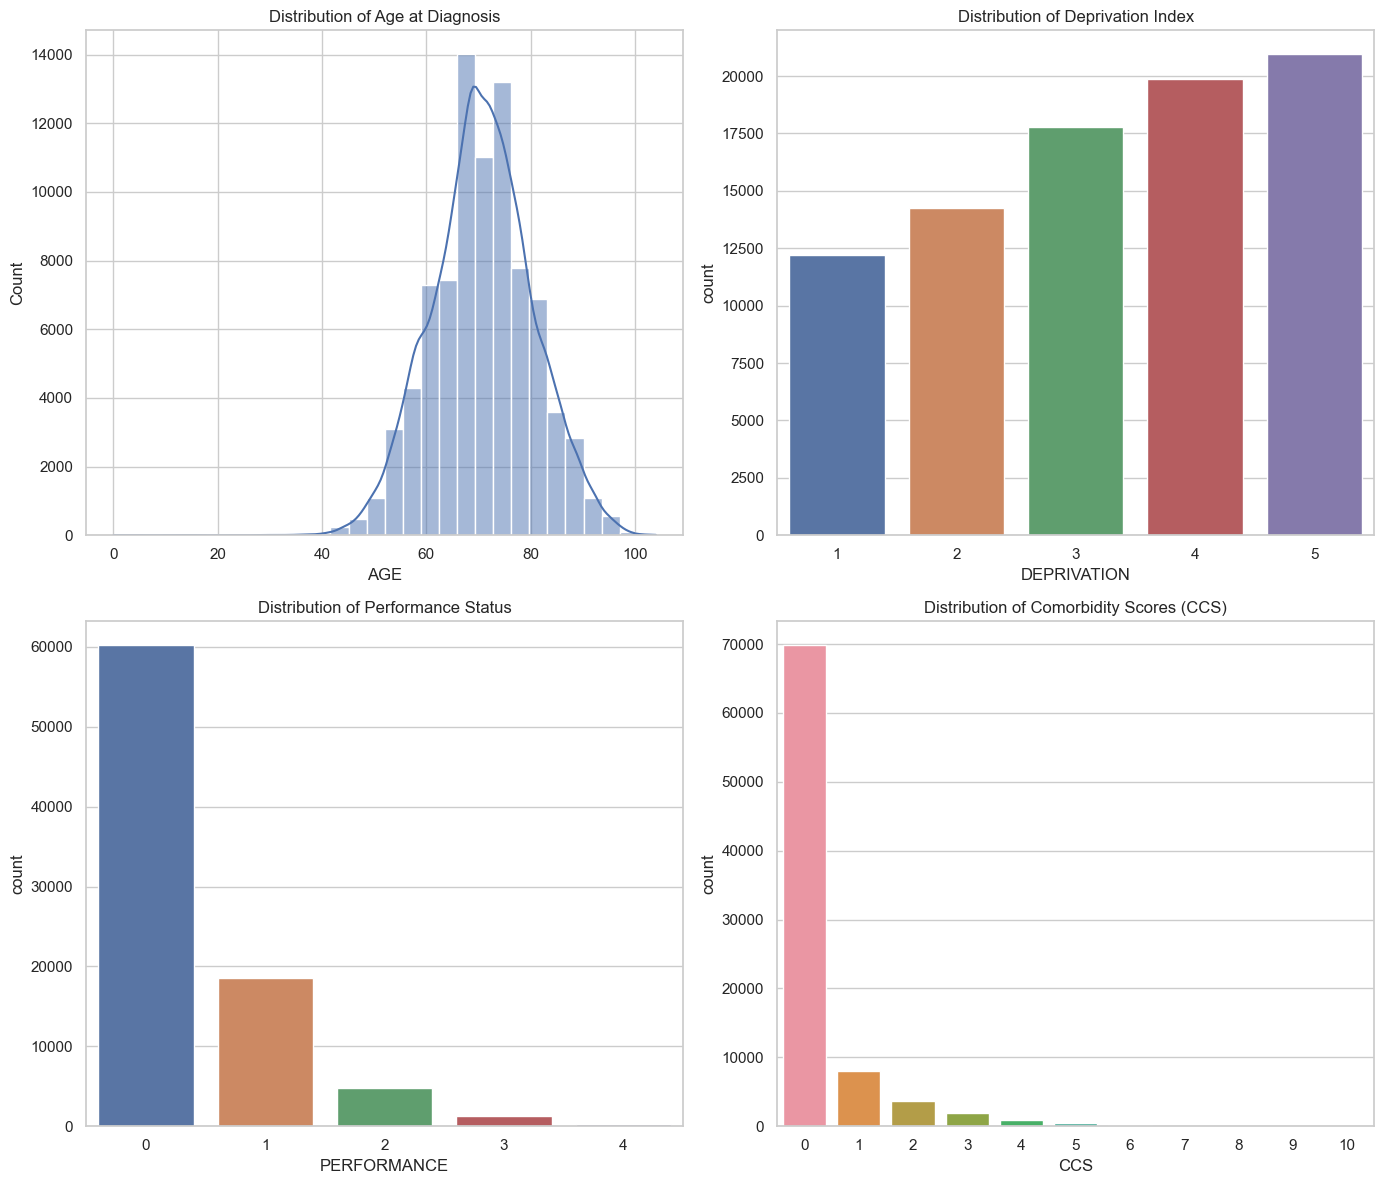

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Distribution of Age
sns.histplot(data=prostate_data, x='AGE', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age at Diagnosis')

# Distribution of Deprivation Index
sns.countplot(data=prostate_data, x='DEPRIVATION', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Deprivation Index')

# Distribution of Performance Status
sns.countplot(data=prostate_data, x='PERFORMANCE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Performance Status')

# Distribution of Comorbidity Scores (CCS)
sns.countplot(data=prostate_data, x='CCS', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Comorbidity Scores (CCS)')

# Adjust layout
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: Futur

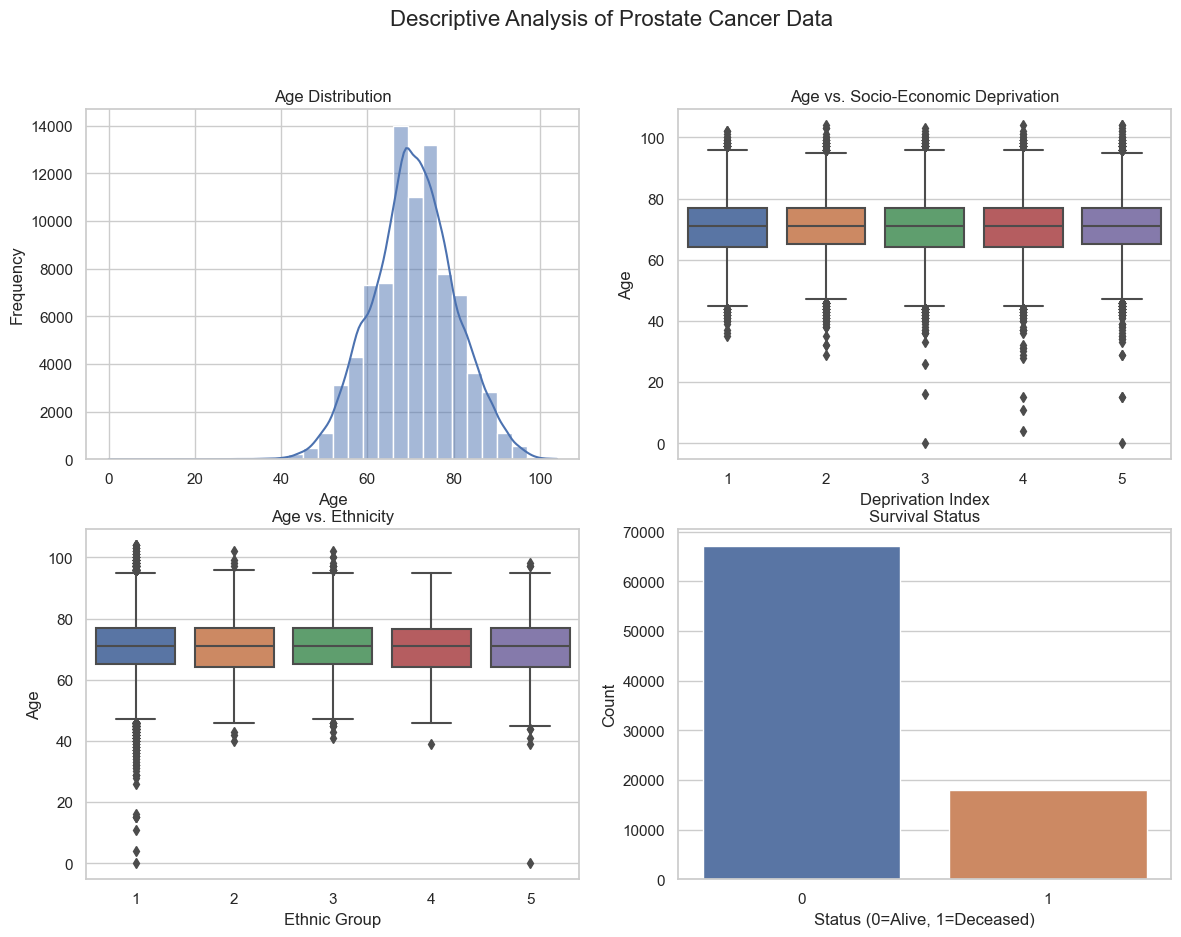

<Figure size 640x480 with 0 Axes>

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Descriptive Analysis of Prostate Cancer Data', fontsize=16)

# Histogram of AGE
sns.histplot(prostate_data['AGE'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Boxplot of AGE by DEPRIVATION
sns.boxplot(x='DEPRIVATION', y='AGE', data=prostate_data, ax=axes[0, 1])
axes[0, 1].set_title('Age vs. Socio-Economic Deprivation')
axes[0, 1].set_xlabel('Deprivation Index')
axes[0, 1].set_ylabel('Age')

# Boxplot of AGE by ETHNIC
sns.boxplot(x='ETHNIC', y='AGE', data=prostate_data, ax=axes[1, 0])
axes[1, 0].set_title('Age vs. Ethnicity')
axes[1, 0].set_xlabel('Ethnic Group')
axes[1, 0].set_ylabel('Age')

# Bar plot of STATUS
sns.countplot(x='STATUS', data=prostate_data, ax=axes[1, 1])
axes[1, 1].set_title('Survival Status')
axes[1, 1].set_xlabel('Status (0=Alive, 1=Deceased)')
axes[1, 1].set_ylabel('Count')



plt.show()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title


In [96]:
# Bar plot of STATUS
# Bar plot of STATUS
sns.countplot(x='GENDER', data=prostate_data, ax=axes[1, 1])
axes[1, 1].set_title('GENDER')
axes[1, 1].set_xlabel('GENDER ')
axes[1, 1].set_ylabel('Count')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [97]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for Age by Ethnic Group
anova_ethnic = ols('AGE ~ C(ETHNIC)', data=prostate_data).fit()
anova_ethnic_table = sm.stats.anova_lm(anova_ethnic, typ=2)

# ANOVA for Age by Deprivation Index
anova_deprivation = ols('AGE ~ C(DEPRIVATION)', data=prostate_data).fit()
anova_deprivation_table = sm.stats.anova_lm(anova_deprivation, typ=2)

anova_ethnic_table, anova_deprivation_table


(                 sum_sq       df         F    PR(>F)
 C(ETHNIC)  2.022572e+02      4.0  0.545333  0.702449
 Residual   7.888219e+06  85074.0       NaN       NaN,
                       sum_sq       df        F    PR(>F)
 C(DEPRIVATION)  3.386553e+02      4.0  0.91311  0.455086
 Residual        7.888083e+06  85074.0      NaN       NaN)

In [98]:
# Checking for missing values in the dataset
missing_data = prostate_data.isnull().sum()

# Checking the data types for encoding purposes
data_types = prostate_data.dtypes

# Overview of the dataset to understand any immediate preprocessing needs
data_overview = prostate_data.describe(include='all')

missing_data, data_types, data_overview


(Unnamed: 0     0
 GENDER         0
 AGE            0
 DEPRIVATION    0
 PERFORMANCE    0
 CCS            0
 STATUS         0
 TIME           0
 ETHNIC         0
 dtype: int64,
 Unnamed: 0       int64
 GENDER           int64
 AGE              int64
 DEPRIVATION      int64
 PERFORMANCE      int64
 CCS              int64
 STATUS           int64
 TIME           float64
 ETHNIC           int64
 dtype: object,
          Unnamed: 0        GENDER           AGE   DEPRIVATION   PERFORMANCE  \
 count  8.507900e+04  85079.000000  85079.000000  85079.000000  85079.000000   
 mean   8.437195e+05      1.010696     70.740782      3.271313      0.387746   
 std    1.202547e+05      0.102867      9.629116      1.373690      0.688056   
 min    1.437620e+05      1.000000      0.000000      1.000000      0.000000   
 25%    7.972185e+05      1.000000     65.000000      2.000000      0.000000   
 50%    8.437340e+05      1.000000     71.000000      3.000000      0.000000   
 75%    8.905610e+05      1.000

In [99]:
# Correcting the AGE anomaly by assuming it's a data entry error, we remove entries where AGE is less than 18
prostate_data_cleaned = prostate_data[prostate_data['AGE'] >= 18]

# Encode categorical variables using one-hot encoding
prostate_data_encoded = pd.get_dummies(prostate_data_cleaned, columns=['GENDER', 'ETHNIC'], drop_first=True)

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Define the features and the target
X = prostate_data_encoded.drop(['STATUS', 'Unnamed: 0'], axis=1)
y = prostate_data_encoded['STATUS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# View the shapes of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((59549, 10), (25522, 10), (59549,), (25522,))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: Futur

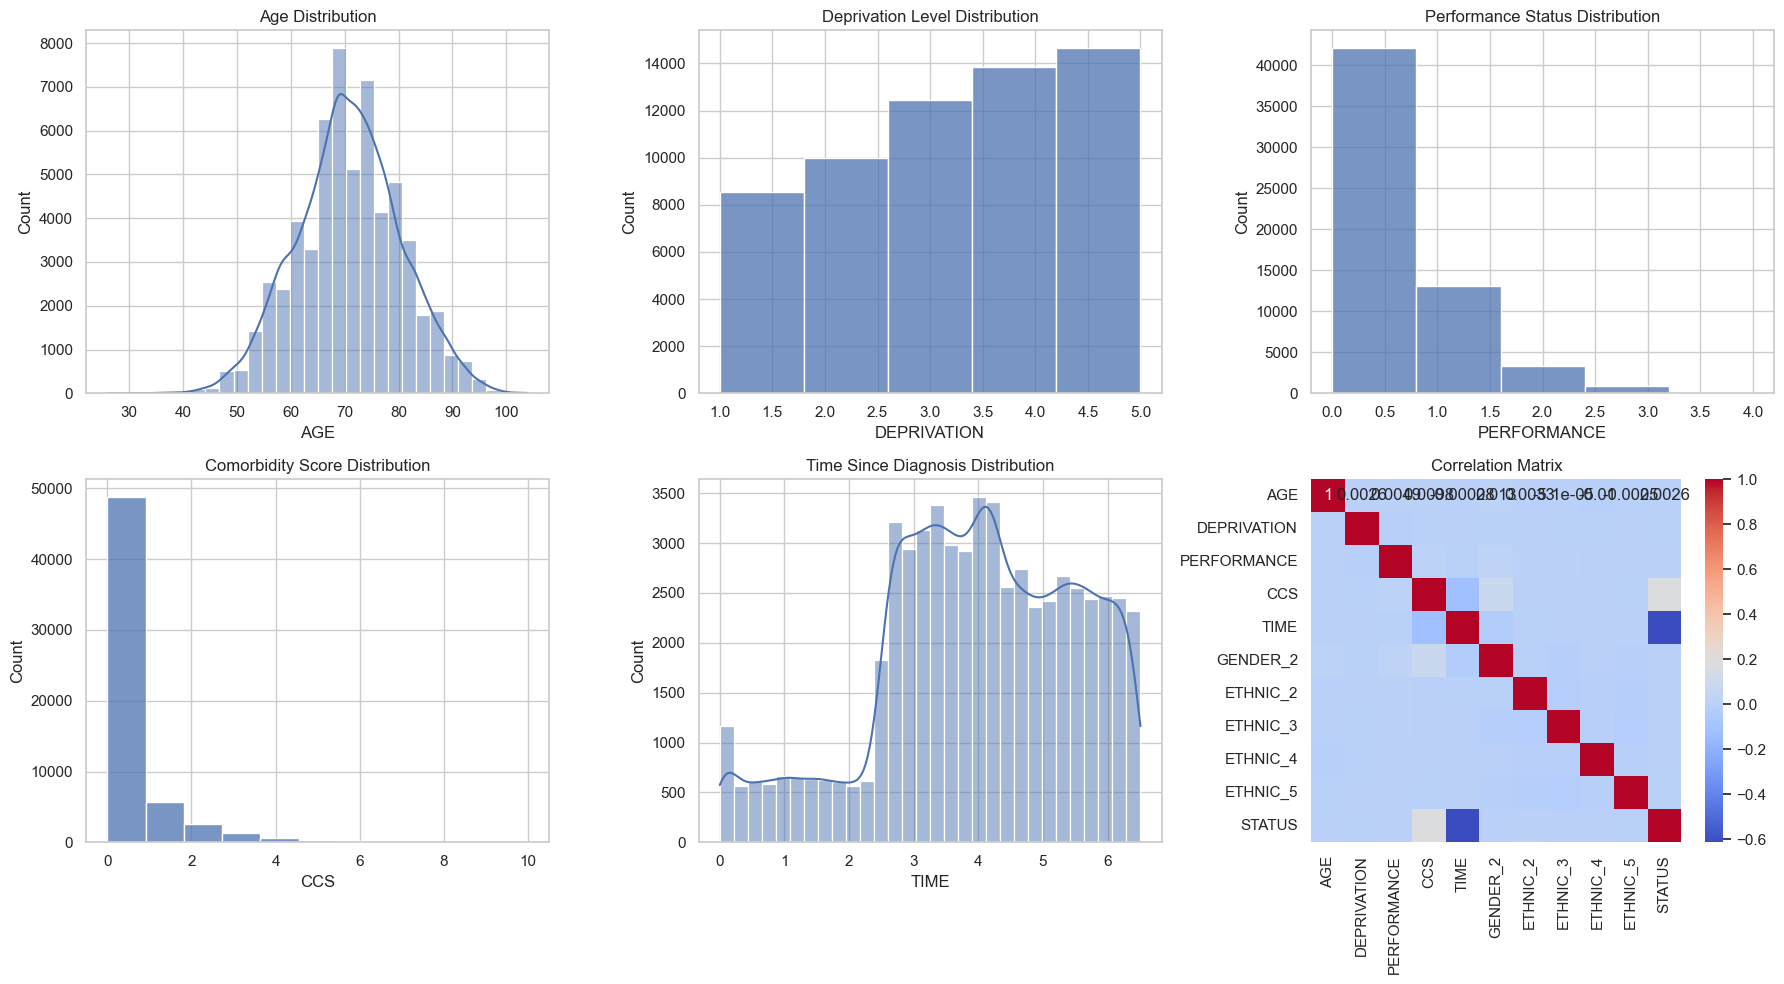

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograms for continuous variables
sns.histplot(data=X_train, x='AGE', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data=X_train, x='DEPRIVATION', bins=5, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Deprivation Level Distribution')

sns.histplot(data=X_train, x='PERFORMANCE', bins=5, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Performance Status Distribution')

sns.histplot(data=X_train, x='CCS', bins=11, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Comorbidity Score Distribution')

sns.histplot(data=X_train, x='TIME', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Time Since Diagnosis Distribution')

# Correlation matrix heatmap
corr_matrix = X_train.join(y_train).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('Correlation Matrix')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [101]:
import pandas as pd

# Assuming 'prostate_data' is your DataFrame name
# Calculate age score
prostate_data['age_score'] = 0
prostate_data.loc[prostate_data['AGE'] > 75, 'age_score'] = 1
prostate_data.loc[prostate_data['AGE'] > 80, 'age_score'] = 2

# Calculate score for Charlson Comorbidity Index
prostate_data['comorbidity_score'] = 0
prostate_data.loc[prostate_data['CCS'] > 1, 'comorbidity_score'] = 1

# Calculate score for Performance Status
prostate_data['performance_score'] = 0
prostate_data.loc[prostate_data['PERFORMANCE'] == 1, 'performance_score'] = 1
prostate_data.loc[prostate_data['PERFORMANCE'] >= 2, 'performance_score'] = 2

# Calculate total frailty score
prostate_data['FRAILTY_SCORE'] = prostate_data['age_score'] + prostate_data['comorbidity_score'] + prostate_data['performance_score']

# Determine frailty status
prostate_data['FRAILTY_STATUS'] = 'Nonfrail'
prostate_data.loc[prostate_data['FRAILTY_SCORE'] >= 2, 'FRAILTY_STATUS'] = 'Frail'


In [102]:
prostate_data.head(5)

,Unnamed: 0,GENDER,AGE,DEPRIVATION,PERFORMANCE,CCS,STATUS,TIME,ETHNIC,age_score,comorbidity_score,performance_score,FRAILTY_SCORE,FRAILTY_STATUS
0,143762,1,79,5,1,1,0,3.58,1,1,0,1,2,Frail
1,144146,1,70,1,0,3,0,4.23,1,0,1,0,1,Nonfrail
2,144261,2,71,4,0,0,0,3.41,1,0,0,0,0,Nonfrail
3,145564,1,73,4,0,1,0,2.74,1,0,0,0,0,Nonfrail
4,146042,1,75,2,0,0,0,3.75,1,0,0,0,0,Nonfrail


In [103]:
prostate_data["FRAILTY_SCORE"].unique()

array([2, 1, 0, 3, 4, 5])

In [104]:
file_path = '/Users/shrichandbhuria/Downloads/All Modules/Sem_2/ Learning Skills through Case Studies/CW4/prostate_final_data.csv'

# Save the DataFrame to a CSV file
prostate_data.to_csv(file_path, index=False)  # Set index=False to avoid saving the DataFrame index as a column


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Assuming the frailty scores and status have been calculated and added to the dataframe
# First, split the data into features and target
X = prostate_data[['AGE', 'GENDER', 'DEPRIVATION', 'ETHNIC', 'PERFORMANCE', 'CCS', 'FRAILTY_SCORE']]
y = prostate_data['STATUS']  # Assuming 'STATUS' is the survival status

# Encode categorical variables as needed (Gender and Ethnicity might need encoding)
X = pd.get_dummies(X, columns=['GENDER', 'ETHNIC'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7893355273468109
ROC-AUC: 0.5749402772664245
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     20108
           1       0.54      0.05      0.09      5416

    accuracy                           0.79     25524
   macro avg       0.67      0.52      0.48     25524
weighted avg       0.74      0.79      0.71     25524



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: Futur

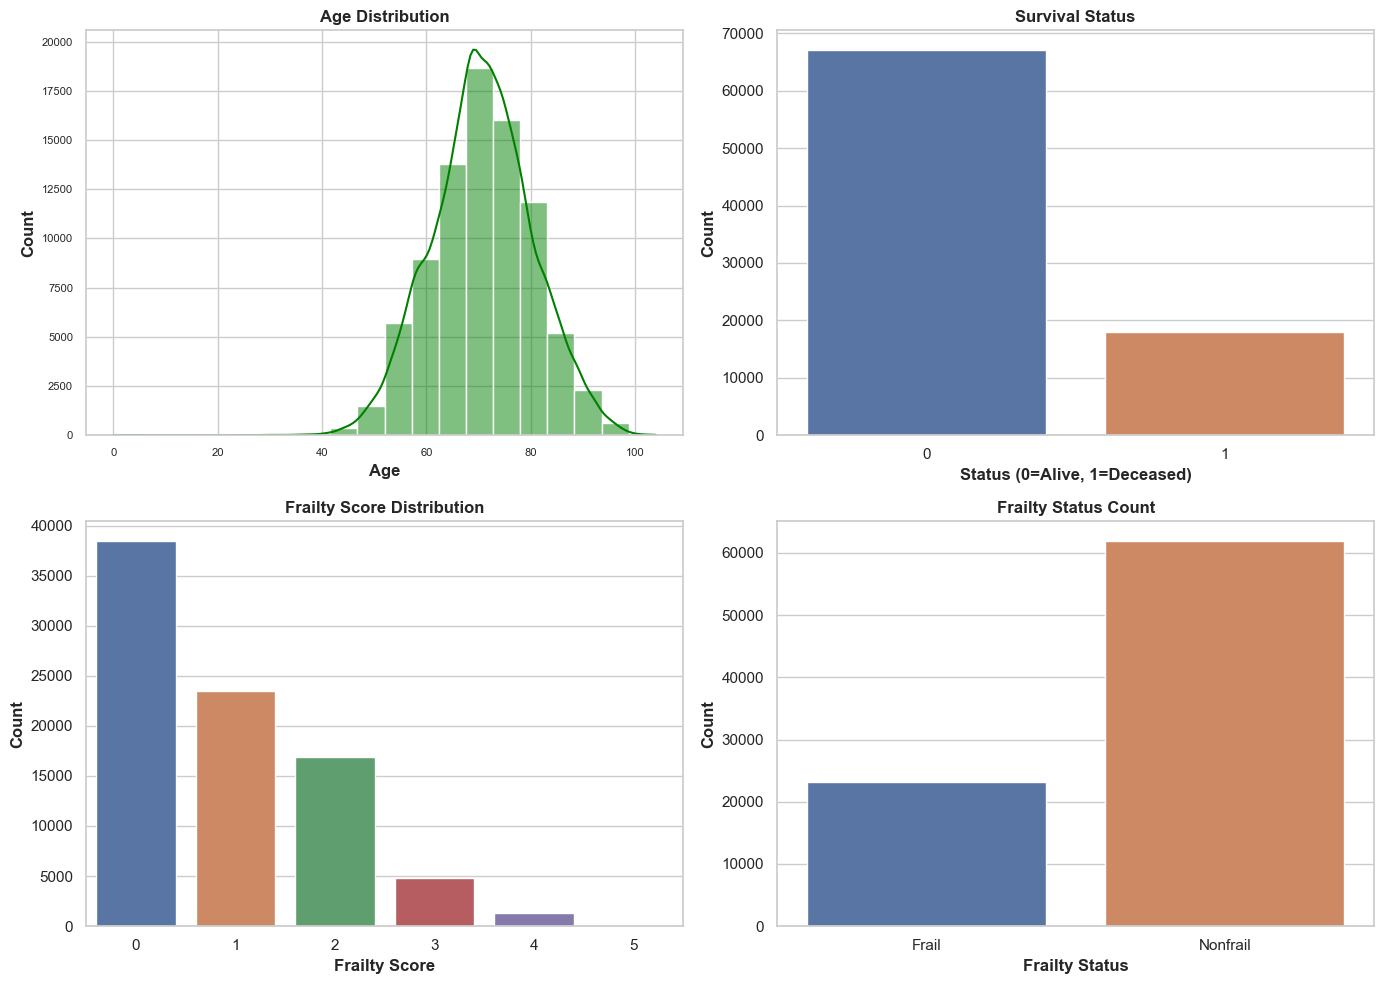

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

# Descriptive statistics for the dataset
stats = prostate_data.describe()

# Visualizations for distribution of key variables
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(prostate_data['AGE'], bins=20, kde=True, ax=ax[0, 0], color='green')
ax[0, 0].set_title('Age Distribution', fontweight='bold')  # Bold title
ax[0, 0].tick_params(axis='both', which='major', labelsize=8, width=2)  # Bold ticks
ax[0, 0].set_xlabel('Age', fontweight='bold')  # Bold x-label
ax[0, 0].set_ylabel('Count', fontweight='bold')  # Bold y-label

# Bar plot of STATUS with color
sns.countplot(x='STATUS', data=prostate_data, ax=ax[0, 1])
ax[0, 1].set_title('Survival Status', fontweight='bold')  # Bold title
ax[0, 1].set_xlabel('Status (0=Alive, 1=Deceased)', fontweight='bold')  # Bold x-label
ax[0, 1].set_ylabel('Count', fontweight='bold')  # Bold y-label

# Frailty Score Distribution
sns.countplot(x='FRAILTY_SCORE', data=prostate_data, ax=ax[1, 0])
ax[1, 0].set_title('Frailty Score Distribution', fontweight='bold')  # Bold title
ax[1, 0].set_xlabel('Frailty Score', fontweight='bold')  # Bold x-label
ax[1, 0].set_ylabel('Count', fontweight='bold')  # Bold y-label

sns.countplot(x='FRAILTY_STATUS', data=prostate_data, ax=ax[1, 1])
ax[1, 1].set_title('Frailty Status Count', fontweight='bold')  # Bold title
ax[1, 1].set_xlabel('Frailty Status', fontweight='bold')  # Bold x-label
ax[1, 1].set_ylabel('Count', fontweight='bold')  # Bold y-label

plt.tight_layout()
plt.show()




In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler


prostate_data['FRAILTY_STATUS_BINARY'] = prostate_data['FRAILTY_STATUS'].map({'frail': 1, 'nonfrail': 0})

# Prepare the data for logistic regression
X = prostate_data[['AGE', 'DEPRIVATION']]
y = prostate_data['FRAILTY_STATUS']  # Assuming binary 0 or 1 for frailty status

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# Prepare the data for Random Forest
X_rf = prostate_data[['AGE', 'DEPRIVATION', 'FRAILTY_SCORE']]
y_rf = prostate_data['TIME']  # Survival time

# Scale features for Random Forest
X_rf_scaled = scaler.fit_transform(X_rf)

# Split the data for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_scaled, y_rf, test_size=0.2, random_state=42)

# Instantiate and fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predict and evaluate the Random Forest model
y_pred_rf = rf.predict(X_test_rf)
mse = mean_squared_error(y_test_rf, y_pred_rf)
print(f'Mean Squared Error: {mse:.2f}')


              precision    recall  f1-score   support

       Frail       0.84      0.63      0.72      4590
    Nonfrail       0.87      0.96      0.91     12426

    accuracy                           0.87     17016
   macro avg       0.86      0.79      0.82     17016
weighted avg       0.87      0.87      0.86     17016

Mean Squared Error: 2.43


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data

# Assuming FRAILTY_STATUS is the column with 'Frail' and 'Nonfrail'
prostate_data['FRAILTY_STATUS_BINARY'] = prostate_data['FRAILTY_STATUS'].replace({'Frail': 1, 'Nonfrail': 0})

# Prepare the data for logistic regression
X = prostate_data[['AGE', 'DEPRIVATION']]
y = prostate_data['FRAILTY_STATUS_BINARY']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)



# Print classification report
print(classification_report(y_test, log_reg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12426
           1       0.84      0.63      0.72      4590

    accuracy                           0.87     17016
   macro avg       0.86      0.79      0.82     17016
weighted avg       0.87      0.87      0.86     17016



In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load data

# Assuming ETHNIC needs to be one-hot encoded and the rest are numeric
categorical_features = ['ETHNIC']
numeric_features = ['GENDER', 'AGE', 'DEPRIVATION']

# Create a column transformer with OneHotEncoder for categorical data and StandardScaler for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first transforms the data then fits a logistic model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Split data into features and target
X = prostate_data[['GENDER', 'AGE', 'DEPRIVATION', 'ETHNIC']]
y = prostate_data['FRAILTY_STATUS_BINARY']  # Assuming FRAIL_STAT is the target variable for the logistic regression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression pipeline
logistic_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_pipeline.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91     12426
           1       0.84      0.63      0.72      4590

    accuracy                           0.87     17016
   macro avg       0.86      0.79      0.82     17016
weighted avg       0.87      0.87      0.86     17016



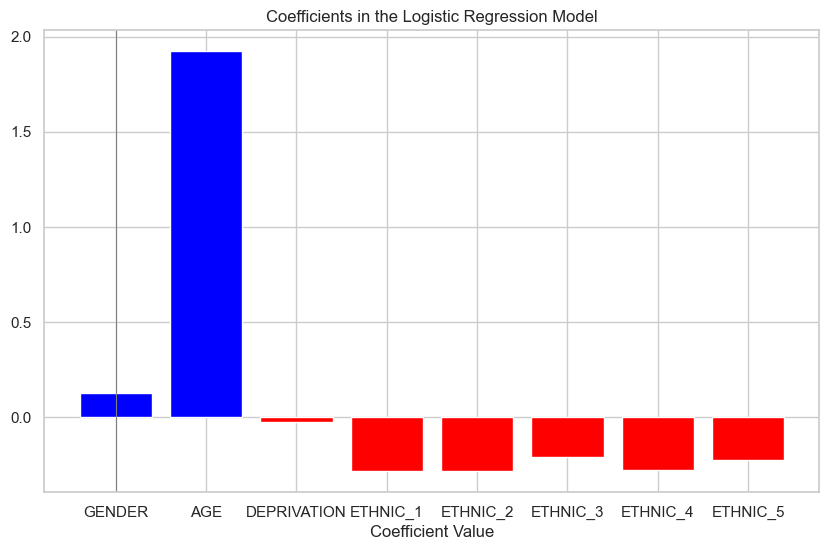

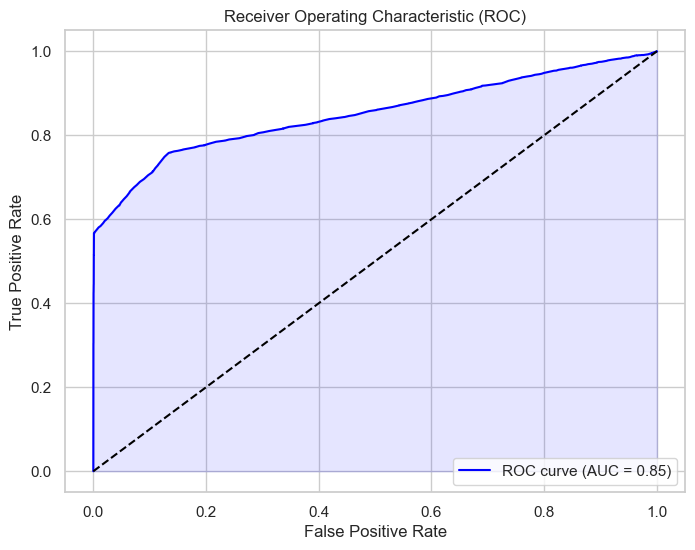

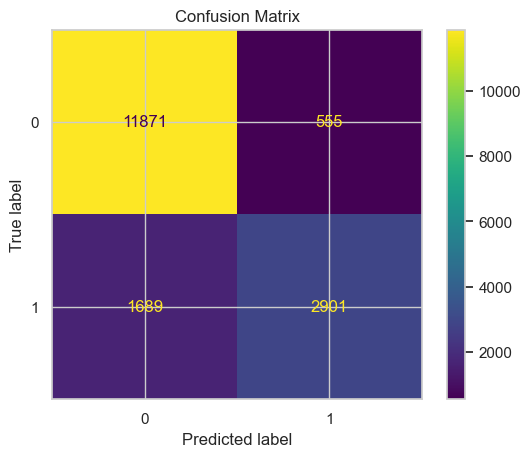

NameError: name 'rf_model' is not defined

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.backends.backend_pdf import PdfPages

# Coefficients Plot
if 'classifier' in logistic_pipeline.named_steps:
    coefs = logistic_pipeline.named_steps['classifier'].coef_[0]
    features = logistic_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
    features = np.concatenate([numeric_features, features])

    colors = ['red' if c < 0 else 'blue' for c in coefs]

    plt.figure(figsize=(10, 6))
    plt.bar(features, coefs, color=colors)  # Using horizontal bars for better visibility
    plt.xlabel('Coefficient Value')
    plt.title('Coefficients in the Logistic Regression Model')
    plt.axvline(x=0, color='grey', lw=0.8)  # Adding a line at zero for reference
    plt.show()

# ROC Curve with AUC Annotation
y_probs = logistic_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.1, color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


# Assuming rf_model has been trained and rf_features defined as per your earlier model setup
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
bars = plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(rf_features)[indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Since we need survival estimates, we'd normally use survival analysis techniques like Kaplan-Meier or Cox Proportional Hazards.
# Here, we just show a simple visualization for predicted survival times from the Random Forest model.
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_rf, bins=30, kde=True, color='red')
plt.title('Predicted Survival Time Distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')


plt.show()


# Display descriptive statistics table
stats